In [517]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures, OneHotEncoder, \
        LabelEncoder
import heejin
from sklearn.metrics import classification_report

In [518]:
irisDF = pd.read_csv('../data/iris.csv')
irisDF.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [519]:
irisDF = irisDF.iloc[:100]
irisDF.variety.value_counts()

variety
Setosa        50
Versicolor    50
Name: count, dtype: int64

In [520]:
targetSR = irisDF['variety'] 
featureDF = irisDF[irisDF.columns[:2]]

In [521]:
encoder = LabelEncoder()
encoder.fit(targetSR)
targetSR = encoder.transform(targetSR)

In [522]:
xtrain, xtest, ytrain, ytest = train_test_split(featureDF,targetSR,test_size=0.2,stratify=targetSR,random_state=11)
# xtrain,xval,ytrain,yval = train_test_split(xtrain,ytrain,test_size=0.3,stratify=ytrain,random_state=11)

In [523]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
# xval = scaler.transform(xval)
xtest = scaler.transform(xtest)
xtrain.shape, xtest.shape

((80, 2), (20, 2))

In [524]:
# 데이터의 분포를 봐야 kernel의 값을 정할 수 있다. -> 분포 그리기 필수!
model = SVC(kernel='linear', probability=True) # 비선형일때 kernel = poly나 lbgfp

model.fit(xtrain,ytrain)

SVC(kernel='linear', probability=True)

In [525]:
model.score(xtrain,ytrain),model.score(xtest,ytest)

(0.9875, 1.0)

In [526]:
# 서포트 벡터
model.support_vectors_, model.n_support_

(array([[-0.09868481,  0.63210926],
        [-0.09868481,  0.63210926],
        [ 0.05611489,  0.84369394],
        [-0.87268331, -0.2142295 ],
        [-1.49188211, -1.69532232],
        [-0.40828421, -0.84898356],
        [-0.09868481, -0.2142295 ],
        [-0.87268331, -1.48373763],
        [ 0.21091459, -0.2142295 ],
        [ 0.83011339,  0.63210926]]),
 array([5, 5]))

In [527]:
ypre  = model.predict(xtest)

pd.DataFrame({'ypre':encoder.inverse_transform(ypre),'ytest':encoder.inverse_transform(ytest)})

,ypre,ytest
0,Versicolor,Versicolor
1,Setosa,Setosa
2,Versicolor,Versicolor
3,Setosa,Setosa
4,Versicolor,Versicolor
5,Setosa,Setosa
6,Versicolor,Versicolor
7,Setosa,Setosa
8,Setosa,Setosa
9,Versicolor,Versicolor


In [528]:
classification_report(ytest,ypre)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00        10\n\n    accuracy                           1.00        20\n   macro avg       1.00      1.00      1.00        20\nweighted avg       1.00      1.00      1.00        20\n'

In [529]:
# 새로운 데이터 예측
newdata = [[4.7,3.2]]
newdata  = scaler.transform(newdata)

newdata_pre = model.predict(newdata)
encoder.inverse_transform(newdata_pre)

C:\Users\kdp\.conda\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array(['Setosa'], dtype=object)

In [530]:
pd.DataFrame(model.predict_proba(newdata), columns=encoder.inverse_transform(model.classes_))

,Setosa,Versicolor
0,0.985292,0.014708


In [531]:
model.decision_function(newdata)

array([-2.23809518])

In [547]:
model.coef_

array([[ 1.84570306, -1.57541325]])

In [546]:
model.intercept_

array([0.2732143])

In [554]:
model.support_vectors_.T


array([[-0.09868481, -0.09868481,  0.05611489, -0.87268331, -1.49188211,
        -0.40828421, -0.09868481, -0.87268331,  0.21091459,  0.83011339],
       [ 0.63210926,  0.63210926,  0.84369394, -0.2142295 , -1.69532232,
        -0.84898356, -0.2142295 , -1.48373763, -0.2142295 ,  0.63210926]])

In [552]:
sv = model.support_vectors_.T
sv[0], sv[1] # 서포트 벡터의 x값, y값

(array([-0.09868481, -0.09868481,  0.05611489, -0.87268331, -1.49188211,
        -0.40828421, -0.09868481, -0.87268331,  0.21091459,  0.83011339]),
 array([ 0.63210926,  0.63210926,  0.84369394, -0.2142295 , -1.69532232,
        -0.84898356, -0.2142295 , -1.48373763, -0.2142295 ,  0.63210926]))

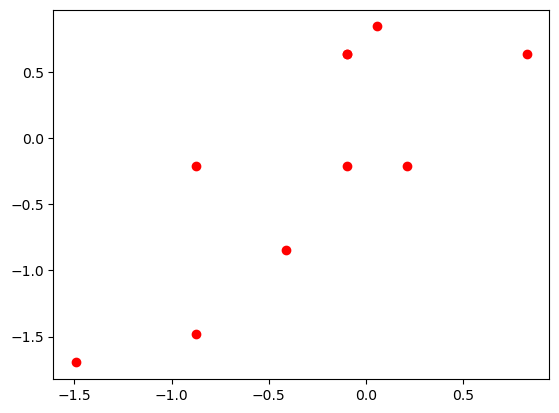

In [533]:
plt.plot(sv[0],sv[1], 'ro') # 서포트 벡터

0.4120936643971181


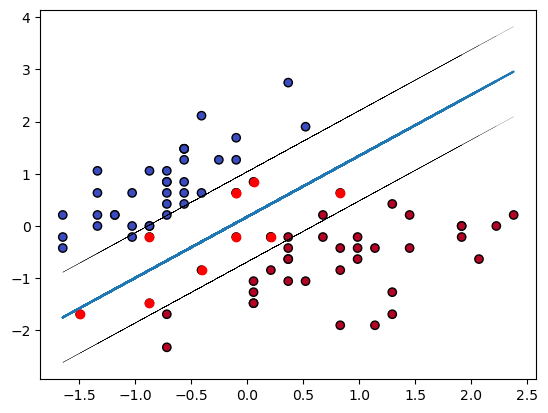

In [578]:
# 결정 경계 그리기

c = model.intercept_
a = model.coef_[0][0]
b = model.coef_[0][1]
w = -(a/ b)

xx = xtrain[:, 0]  # min max 값만 넣으면 됨
yy = (w * xtrain[:, 0] - c/b)
# w * xtrain[:, 0] - c/b)

margin = 1 / np.sqrt(a**2 + b**2)
print(margin)
# margin1 = 1 / np.sqrt(np.sum(model.coef_ ** 2)) #분산 
# print(margin1)
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin


plt.plot(xtrain[:, 0], yy)
plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ytrain, cmap=plt.cm.coolwarm, edgecolors='k')
plt.plot(sv[0],sv[1], 'ro') # 서포트 벡터
plt.plot(xx, yy_down, 'k--', lw = 0.1)
plt.plot(xx, yy_up, 'k--', lw = 0.1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


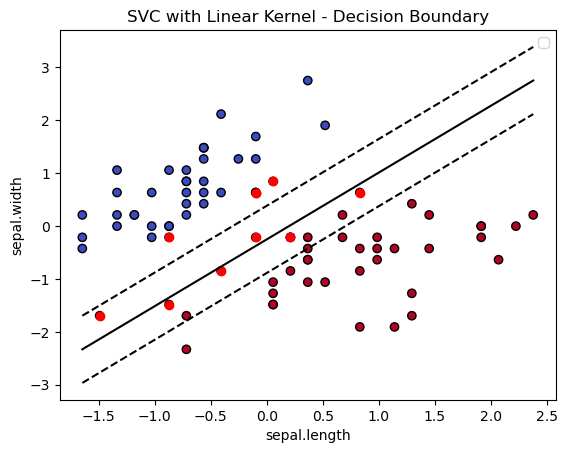

In [541]:



margin = 1 / np.sqrt(np.sum(model.coef_ ** 2)) #분산 
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# Support vectors
plt.plot(sv[0],sv[1], 'ro') # 서포트 벡터
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
# Scatter plot
plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ytrain, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel(featureDF.columns[0])
plt.ylabel(featureDF.columns[1])
plt.legend(loc='upper right')  # 범례 위치 지정
plt.title('SVC with Linear Kernel - Decision Boundary')
plt.show()

C:\Users\kdp\.conda\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


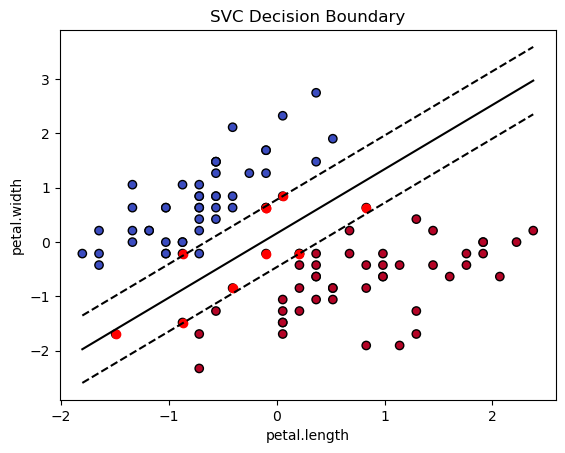

In [540]:
X = np.array(featureDF)
y = targetSR.T

X =scaler.transform(X)
# SVC 모델 생성
svc_model = SVC(kernel='linear')
svc_model.fit(X, y)

# 결정 경계 그리기
w = svc_model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min(), X[:, 0].max())
yy = a * xx - (svc_model.intercept_[0]) / w[1]

# Support vectors
margin = 1 / np.sqrt(np.sum(svc_model.coef_ ** 2)) #분산 
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.plot(sv[0],sv[1], 'ro') # 서포트 벡터
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--') # 점선
plt.plot(xx, yy_up, 'k--') # 점선 

# Scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
# plt.ylim(-1.5,2)
plt.xlabel('petal.length')
plt.ylabel('petal.width')
plt.title('SVC Decision Boundary')
plt.show()


KeyError: 'patal.width'

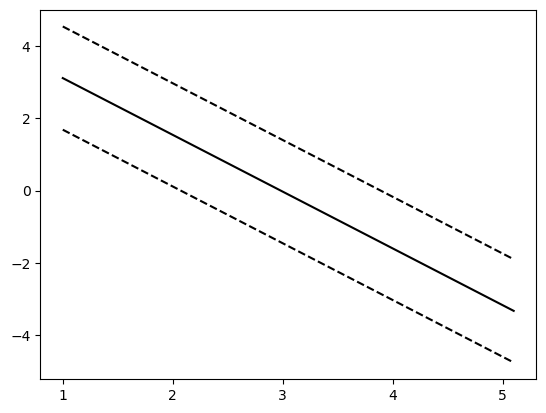

In [545]:
df=pd.read_csv('../data/iris.csv')
df=df.iloc[:100]
feature=df[df.columns[2:4]]
target=df[df.columns[-1]]

clf = SVC(kernel="linear", C=1)       # => 이 부분만 달라짐, 나머지는 고정
clf.fit(feature, target)

w = clf.coef_[0] # 가중치값 구하기
a = -w[0] / w[1] # 기울기값 구하기
xx = np.linspace(feature[feature.columns[0]].min(),feature[feature.columns[0]].max()) # x 정의역 설정 
yy = a * xx - (clf.intercept_[0]) / w[1] # 결정 경계 완성!

# 수학적으로 결정 경계(seperating hyperplane) 주변의 서포트 벡터들은
# 거리가 np.sqrt(1 + a**2)만큼 떨어져 있음 
margin = 1 / np.sqrt(np.sum(clf.coef_**2)) # 입실론 설정 = 1/||w|| = 1/가중치 벡터의 놈(norm)
yy_down = yy - np.sqrt(1 + a**2) * margin # 아래 직선
yy_up = yy + np.sqrt(1 + a**2) * margin # 위 직선

plt.plot(xx, yy, "k-") # 결정 경계 그리기
plt.plot(xx, yy_down, "k--") # 주변 서포트 벡터1
plt.plot(xx, yy_up, "k--") # 주변 서포트 벡터2

# 데이터 점들 찍기
plt.scatter(feature["patal.width"].values,feature["patal.length"].values, c=target.values)
# 서포트 벡터 머신 표시
plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],color="green")
plt.ylim(feature[feature.columns[1]].min()-0.5,feature[feature.columns[1]].max()+0.3)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

parm = {'kernel': ['rbf','poly','linear', 'sigmoid', 'precomputed']
        ,'C':[0.01,0.1,0.15,0.2,0.25]}

modelCV = GridSearchCV(estimator=model, param_grid=parm, return_train_score=True)

In [ ]:
from scipy.spatial.distance import pdist, squareform
modelCV.fit(squareform(pdist(xtrain)),ytrain)

In [ ]:
modelCV.best_estimator_

In [ ]:
modelCV.best_score_

In [ ]:
cv_resultsDF = pd.DataFrame(modelCV.cv_results_)
cv_resultsDF.iloc[2]

In [ ]:
newdata = modelCV.predict(xtest)
encoder.inverse_transform(newdata)